## FMTC Network Evaluation Tool

In [1]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import salem
import matplotlib.pyplot as plt
import utm

[37.36576632 37.36576632 37.36576632 ... 37.36681112 37.36681402
 37.36681402] [126.7253287 126.7253287 126.7253287 ... 126.7268169 126.7268222
 126.7268222]


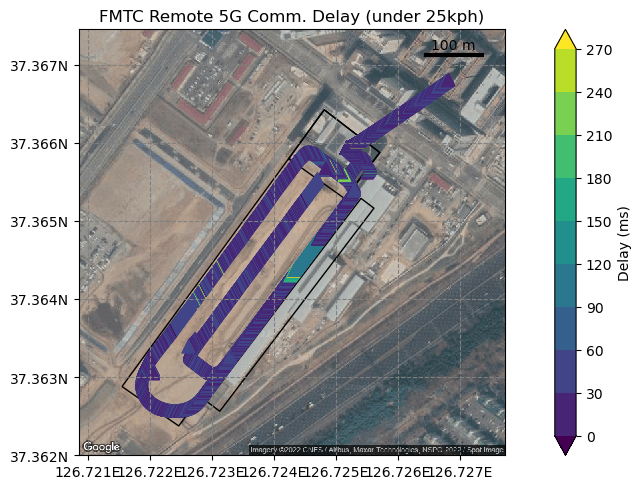

In [57]:

# prepare the figure
f, ax1 = plt.subplots(1, 1, figsize=(12, 5))

# read the shapefile and use its extent to define a ideally sized map
shp = salem.read_shapefile('./fmtc_hdmap/fmtc_3-polygon.shp')
# I you need to do a lot of maps you might want
# to use an API key and set it here with key='YOUR_API_KEY'
g = GoogleVisibleMap(x=[shp.min_x, shp.max_x], y=[shp.min_y, shp.max_y],
                     scale=1,  # scale is for more details
                    )  # try out also: 'terrain'

# the google static image is a standard rgb image
ggl_img = g.get_vardata()


# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_shapefile(shp)  # add the glacier outlines
sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
sm.visualize(ax=ax1)  # plot it
ax1.set_title('FMTC Remote 5G Comm. Delay (under 25kph)')

# read the point GPR data and add them to the plot
df = pd.read_csv('./log_20220907204305.csv')
df.drop_duplicates(["delay_ms"])
df = df.drop(df[df["vEgo_in_ms"] > 25].index)


dl = DataLevels(df.delay_ms, levels=np.arange(0, 300, 30), extend='both')

lat, lon = utm.to_latlon(df.RTK_X.values, df.RTK_Y.values, 52, 'S')
print(lat, lon)
x, y = sm.grid.transform(lon, lat)
ax1.scatter(x, y, marker='^', color=dl.to_rgb(), s=90, edgecolors='k', linewidths=0)
dl.append_colorbar(ax1, label='Delay (ms)')

# make it nice
plt.tight_layout()
plt.show()

[37.36580752 37.36580752 37.36580752 ... 37.36527002 37.36527002
 37.36527002] [126.724394  126.724394  126.724394  ... 126.7251736 126.7251736
 126.7251736]


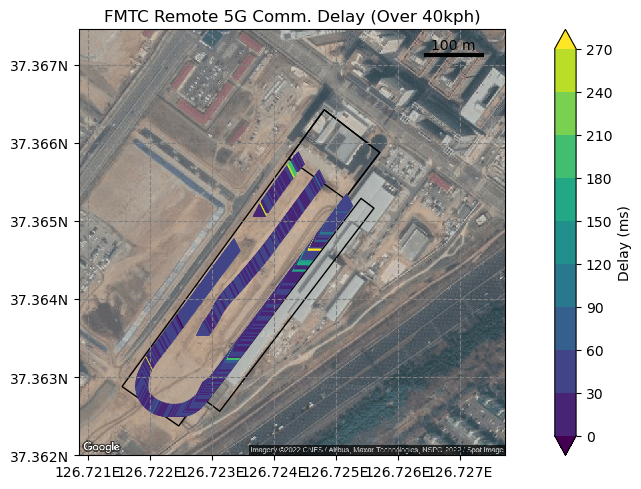

In [60]:

# prepare the figure
f, ax1 = plt.subplots(1, 1, figsize=(12, 5))

# read the shapefile and use its extent to define a ideally sized map
shp = salem.read_shapefile('./fmtc_hdmap/fmtc_3-polygon.shp')
# I you need to do a lot of maps you might want
# to use an API key and set it here with key='YOUR_API_KEY'
g = GoogleVisibleMap(x=[shp.min_x, shp.max_x], y=[shp.min_y, shp.max_y],
                     scale=1,  # scale is for more details
                    )  # try out also: 'terrain'

# the google static image is a standard rgb image
ggl_img = g.get_vardata()


# make a map of the same size as the image (no country borders)
sm = Map(g.grid, factor=1, countries=False)
sm.set_shapefile(shp)  # add the glacier outlines
sm.set_rgb(ggl_img)  # add the background rgb image
sm.set_scale_bar(location=(0.88, 0.94))  # add scale
sm.visualize(ax=ax1)  # plot it
ax1.set_title('FMTC Remote 5G Comm. Delay (Over 40kph)')

# read the point GPR data and add them to the plot
df = pd.read_csv('./log_20220907204305.csv')
df.drop_duplicates(["delay_ms"])
df = df.drop(df[df["vEgo_in_ms"] < 40].index)


dl = DataLevels(df.delay_ms, levels=np.arange(0, 300, 30), extend='both')

lat, lon = utm.to_latlon(df.RTK_X.values, df.RTK_Y.values, 52, 'S')
print(lat, lon)
x, y = sm.grid.transform(lon, lat)
ax1.scatter(x, y, marker='^', color=dl.to_rgb(), s=90, edgecolors='k', linewidths=0)
dl.append_colorbar(ax1, label='Delay (ms)')

# make it nice
plt.tight_layout()
plt.show()

In [49]:
max(df.delay_ms)
min(df.delay_ms)
df = df.drop(df[df["vEgo_in_ms"] == -1].index)
min(df.delay_ms)


-1.0

In [51]:
df = pd.read_csv('./log_20220907204305.csv')
max(df.vEgo_in_ms)

82.9

In [24]:
df.any(["vEgo_in_ms"] ,df["vEgo_in_ms"] > 40)

TypeError: unhashable type: 'list'